# This is a sample Jupyter Notebook to demo the connection of this to the overall environment of this baseball analysis system built through docker compose

In [5]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def test_postgres_connection():
    try:
        # Define connection parameters
        conn = psycopg2.connect(
            dbname="MLB_DATA",
            user="user",
            password="password",
            host="postgres",
            port="5432"
        )
        
        # Create a cursor and test the connection
        cur = conn.cursor()
        cur.execute("SELECT 1;")
        cur.fetchone()
        
        print("Connected to PostgreSQL successfully.")
        return 'success'  # Return the connection object if successful

    except psycopg2.Error as e:
        print("Error connecting to PostgreSQL:", e)
        raise  # raise error for error

### I will test a Connection to The Database First

In [4]:
test_postgres_connection()

Connected to PostgreSQL successfully.


'success'

In [10]:
# Function to get Pitcher Info
def get_all_pitches_info(pitcher_id: int):
    try:
        # Define connection parameters
        conn = psycopg2.connect(
            dbname="MLB_DATA",
            user="user",
            password="password",
            host="postgres",
            port="5432"
        )
        cur = conn.cursor()

        df = pd.read_sql(f"SELECT * FROM PITCH_INFO_FACT WHERE PITCHER_ID = {pitcher_id};", conn )

        return df 

    except psycopg2.Error as e:
        print("Error connecting to PostgreSQL:", e)
        raise  # raise error for error

In [11]:
nathan_eovaldi_pitches = get_all_pitches_info(543135)

print(nathan_eovaldi_pitches.head(15))
print(nathan_eovaldi_pitches.info())

nathan_eovaldi_pitches['pitch_name'].unique()

/tmp/ipykernel_21/3498102289.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM PITCH_INFO_FACT WHERE PITCHER_ID = {pitcher_id};", conn )


                    pitch_id  pitcher_id  batter_id             hit_id  \
0   744961543135543807111Top      543135     543807  74496154380711Top   
1   744961543135666182241Top      543135     666182               None   
2   744961543135666182231Top      543135     666182               None   
3   744961543135666182221Top      543135     666182               None   
4   744961543135666182211Top      543135     666182               None   
5   744961543135665489311Top      543135     665489  74496166548931Top   
6   744961543135687462451Top      543135     687462  74496168746241Top   
7   744961543135687462441Top      543135     687462               None   
8   744961543135687462431Top      543135     687462               None   
9   744961543135687462421Top      543135     687462               None   
10  744961543135687462411Top      543135     687462               None   
11  744961543135672386511Top      543135     672386  74496167238651Top   
12  744961543135676391631Top      5431

Number of null values in pitch_name: 15
Number of null values in pitch_name: 0
['4-Seam Fastball' 'Slider' 'Split-Finger' 'Cutter' 'Curveball' 'Sinker'
 'Pitch Out' 'Intentional Ball' 'Changeup']
pitch_name
4-Seam Fastball     6717
Split-Finger        3344
Cutter              2886
Curveball           2278
Slider              1458
Changeup              72
Sinker                18
Intentional Ball       5
Pitch Out              3
Name: count, dtype: int64


/tmp/ipykernel_21/766336103.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pitch_counts, x='Pitch Type', y='Count', palette='viridis')


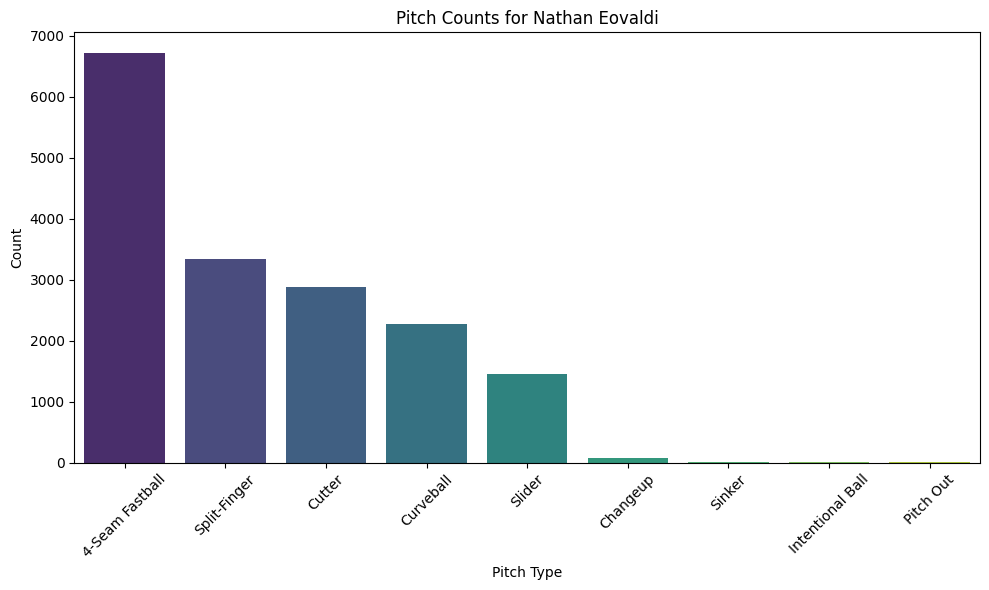

In [18]:
null_count = nathan_eovaldi_pitches['pitch_name'].isnull().sum()
print(f'Number of null values in pitch_name: {null_count}')


nathan_eovaldi_pitches = nathan_eovaldi_pitches.dropna(subset=['pitch_name'])

null_count = nathan_eovaldi_pitches['pitch_name'].isnull().sum()
print(f'Number of null values in pitch_name: {null_count}')


print(nathan_eovaldi_pitches['pitch_name'].unique())
pitch_numbers = nathan_eovaldi_pitches['pitch_name'].value_counts()
print(pitch_numbers)

# Convert Series to DataFrame
pitch_counts = pitch_numbers.reset_index()
pitch_counts.columns = ['Pitch Type', 'Count']  # Rename columns for clarity

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=pitch_counts, x='Pitch Type', y='Count', palette='viridis')
plt.title('Pitch Counts for Nathan Eovaldi')
plt.xlabel('Pitch Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()